In [1]:
#For testig of weights
import numpy as np
import time
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# display function to show image on Jupyter
def display_img(img,cmap=None):
    fig = plt.figure(figsize = (12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

In [3]:
# Load the COCO class labels in which our YOLO model was trained on

labelsPath = os.path.join("/Users/Aveen Faheem/Desktop/Anaconda_work/Datanew/yolo.names")
LABELS = open(labelsPath).read().strip().split("\n")

In [4]:
# The COCO dataset contains 80 different classes
LABELS

['cough', 'sneeze']

In [5]:
# derive the paths to the YOLO weights and model configuration
weightsPath = os.path.join("/Users/Aveen Faheem/Desktop/Anaconda_work/Datanew/yolov31_3000.weights")
configPath = os.path.join("/Users/Aveen Faheem/Desktop/Anaconda_work/Datanew/yolov31.cfg")

In [6]:
# Loading the neural network framework Darknet (YOLO was created based on this framework)
net = cv2.dnn.readNetFromDarknet(configPath,weightsPath)

In [7]:
# Create the function which predict the frame input
def predict(image):
    
    # initialize a list of colors to represent each possible class label
    np.random.seed(42)
    COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")
    (H, W) = image.shape[:2]
    
    # determine only the "ouput" layers name which we need from YOLO
    ln = net.getLayerNames()
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    
    # construct a blob from the input image and then perform a forward pass of the YOLO object detector, 
    # giving us our bounding boxes and associated probabilities
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    layerOutputs = net.forward(ln)
    
    boxes = []
    confidences = []
    classIDs = []
    threshold = 0.15
    
    # loop over each of the layer outputs
    for output in layerOutputs:
        # loop over each of the detections
        for detection in output:
            # extract the class ID and confidence (i.e., probability) of
            # the current object detection
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            # filter out weak predictions by ensuring the detected
            # probability is greater than the minimum probability
            # confidence type=float, default=0.5
            if confidence > threshold:
                # scale the bounding box coordinates back relative to the
                # size of the image, keeping in mind that YOLO actually
                # returns the center (x, y)-coordinates of the bounding
                # box followed by the boxes' width and height
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")

                # use the center (x, y)-coordinates to derive the top and
                # and left corner of the bounding box
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))

                # update our list of bounding box coordinates, confidences,
                # and class IDs
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)

    # apply non-maxima suppression to suppress weak, overlapping bounding boxes
    # confidence type=float, default=0.5
    # threshold type=float, default=0.3,
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, threshold, 0.1)

    # ensure at least one detection exists
    if len(idxs) > 0:
        # loop over the indexes we are keeping
        for i in idxs.flatten():
            # extract the bounding box coordinates
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])

            # draw a bounding box rectangle and label on the image
            color = (255,0,0)
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            text = "{}".format(LABELS[classIDs[i]], confidences[i])
            cv2.putText(image, text, (x +15, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                1, color, 3)
    return image

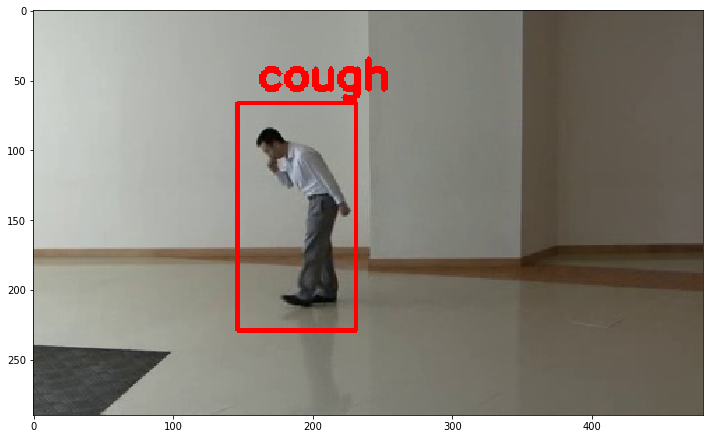

In [8]:
# Execute prediction on a single image
img = cv2.imread("/Users/Aveen Faheem/Desktop/Anaconda_work/Datanew/images/cough195.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))

In [ ]:
### Apply Yolov3 for object dectection on a video

cap =cv2.VideoCapture('/Users/Aveen Faheem/Desktop/Anaconda_work/couandsnee/cough.avi')

number_frame = 30.0 #higher frames better quality of the video
video_size = (1280,720)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('coughoutput.mp4',fourcc, number_frame,video_size)

while True:
    ret,frame = cap.read() 
    
    if ret:
        
        frame = cv2.resize(frame, (1280,720))
        frame = predict(frame)
        cv2.imshow("image",frame)
        out.write(frame)

        if cv2.waitKey(1) & 0xff == ord("q"):
            break
    else:
        break
        
cap.release()   
out.release()
cv2.destroyAllWindows()

In [ ]:
### Apply Yolov3 for object dectection on a video

cap =cv2.VideoCapture('/Users/Aveen Faheem/Desktop/Anaconda_work/couandsnee/cough1.avi')

number_frame = 30.0 #higher frames better quality of the video
video_size = (1280,720)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('coughoutput1.mp4',fourcc, number_frame,video_size)

while True:
    ret,frame = cap.read() 
    
    if ret:
        
        frame = cv2.resize(frame, (1280,720))
        frame = predict(frame)
        cv2.imshow("image",frame)
        out.write(frame)

        if cv2.waitKey(1) & 0xff == ord("q"):
            break
    else:
        break
        
cap.release()   
out.release()
cv2.destroyAllWindows()

In [ ]:
### Apply Yolov3 for object dectection on a video

cap =cv2.VideoCapture('/Users/Aveen Faheem/Desktop/Anaconda_work/couandsnee/sneeze.avi')

number_frame = 30.0 #higher frames better quality of the video
video_size = (1280,720)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('sneezeoutput.mp4',fourcc, number_frame,video_size)

while True:
    ret,frame = cap.read() 
    
    if ret:
        
        frame = cv2.resize(frame, (1280,720))
        frame = predict(frame)
        cv2.imshow("image",frame)
        out.write(frame)

        if cv2.waitKey(1) & 0xff == ord("q"):
            break
    else:
        break
        
cap.release()   
out.release()
cv2.destroyAllWindows()

In [ ]:
### Apply Yolov3 for object dectection on a video

cap =cv2.VideoCapture('/Users/Aveen Faheem/Desktop/Anaconda_work/couandsnee/sneeze1.avi')

number_frame = 30.0 #higher frames better quality of the video
video_size = (1280,720)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('sneezeoutput1.mp4',fourcc, number_frame,video_size)

while True:
    ret,frame = cap.read() 
    
    if ret:
        
        frame = cv2.resize(frame, (1280,720))
        frame = predict(frame)
        cv2.imshow("image",frame)
        out.write(frame)

        if cv2.waitKey(1) & 0xff == ord("q"):
            break
    else:
        break
        
cap.release()   
out.release()
cv2.destroyAllWindows()

In [ ]:
### Apply Yolov3 for object dectection on a video

cap =cv2.VideoCapture('/Users/Aveen Faheem/Desktop/Anaconda_work/v.mp4')

number_frame = 30.0 #higher frames better quality of the video
video_size = (1280,720)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('nocs.mp4',fourcc, number_frame,video_size)

while True:
    ret,frame = cap.read() 
    
    if ret:
        
        frame = cv2.resize(frame, (1280,720))
        frame = predict(frame)
        cv2.imshow("image",frame)
        out.write(frame)

        if cv2.waitKey(1) & 0xff == ord("q"):
            break
    else:
        break
        
cap.release()   
out.release()
cv2.destroyAllWindows()

In [ ]:
### Apply Yolov3 for object dectection on a video

cap =cv2.VideoCapture('/Users/Aveen Faheem/Desktop/Anaconda_work/couandsnee/c.avi')

number_frame = 30.0 #higher frames better quality of the video
video_size = (1280,720)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('coutput.mp4',fourcc, number_frame,video_size)

while True:
    ret,frame = cap.read() 
    
    if ret:
        
        frame = cv2.resize(frame, (1280,720))
        frame = predict(frame)
        cv2.imshow("image",frame)
        out.write(frame)

        if cv2.waitKey(1) & 0xff == ord("q"):
            break
    else:
        break
        
cap.release()   
out.release()
cv2.destroyAllWindows()

In [ ]:
### Apply Yolov3 for object dectection on a video

cap =cv2.VideoCapture('/Users/Aveen Faheem/Desktop/Anaconda_work/couandsnee/c1.avi')

number_frame = 30.0 #higher frames better quality of the video
video_size = (1280,720)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('c1output.mp4',fourcc, number_frame,video_size)

while True:
    ret,frame = cap.read() 
    
    if ret:
        
        frame = cv2.resize(frame, (1280,720))
        frame = predict(frame)
        cv2.imshow("image",frame)
        out.write(frame)

        if cv2.waitKey(1) & 0xff == ord("q"):
            break
    else:
        break
        
cap.release()   
out.release()
cv2.destroyAllWindows()

In [ ]:
### Apply Yolov3 for object dectection on a video

cap =cv2.VideoCapture('/Users/Aveen Faheem/Desktop/Anaconda_work/couandsnee/c2.avi')

number_frame = 30.0 #higher frames better quality of the video
video_size = (1280,720)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('c2output.mp4',fourcc, number_frame,video_size)

while True:
    ret,frame = cap.read() 
    
    if ret:
        
        frame = cv2.resize(frame, (1280,720))
        frame = predict(frame)
        cv2.imshow("image",frame)
        out.write(frame)

        if cv2.waitKey(1) & 0xff == ord("q"):
            break
    else:
        break
        
cap.release()   
out.release()
cv2.destroyAllWindows()

In [ ]:
### Apply Yolov3 for object dectection on a video

cap =cv2.VideoCapture('/Users/Aveen Faheem/Desktop/Anaconda_work/couandsnee/c3.avi')

number_frame = 30.0 #higher frames better quality of the video
video_size = (1280,720)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('c3output.mp4',fourcc, number_frame,video_size)

while True:
    ret,frame = cap.read() 
    
    if ret:
        
        frame = cv2.resize(frame, (1280,720))
        frame = predict(frame)
        cv2.imshow("image",frame)
        out.write(frame)

        if cv2.waitKey(1) & 0xff == ord("q"):
            break
    else:
        break
        
cap.release()   
out.release()
cv2.destroyAllWindows()

In [ ]:
### Apply Yolov3 for object dectection on a video

cap =cv2.VideoCapture('/Users/Aveen Faheem/Desktop/Anaconda_work/couandsnee/c4.avi')

number_frame = 30.0 #higher frames better quality of the video
video_size = (1280,720)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('c4output.mp4',fourcc, number_frame,video_size)

while True:
    ret,frame = cap.read() 
    
    if ret:
        
        frame = cv2.resize(frame, (1280,720))
        frame = predict(frame)
        cv2.imshow("image",frame)
        out.write(frame)

        if cv2.waitKey(1) & 0xff == ord("q"):
            break
    else:
        break
        
cap.release()   
out.release()
cv2.destroyAllWindows()

In [12]:
### Apply Yolov3 for object dectection on a video

cap =cv2.VideoCapture('/Users/Aveen Faheem/Desktop/Anaconda_work/couandsnee/1.avi')

number_frame = 30.0 #higher frames better quality of the video
video_size = (1280,720)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('testoutput.mp4',fourcc, number_frame,video_size)

while True:
    ret,frame = cap.read() 
    
    if ret:
        
        frame = cv2.resize(frame, (1280,720))
        frame = predict(frame)
        cv2.imshow("image",frame)
        out.write(frame)

        if cv2.waitKey(1) & 0xff == ord("q"):
            break
    else:
        break
        
cap.release()   
out.release()
cv2.destroyAllWindows()  